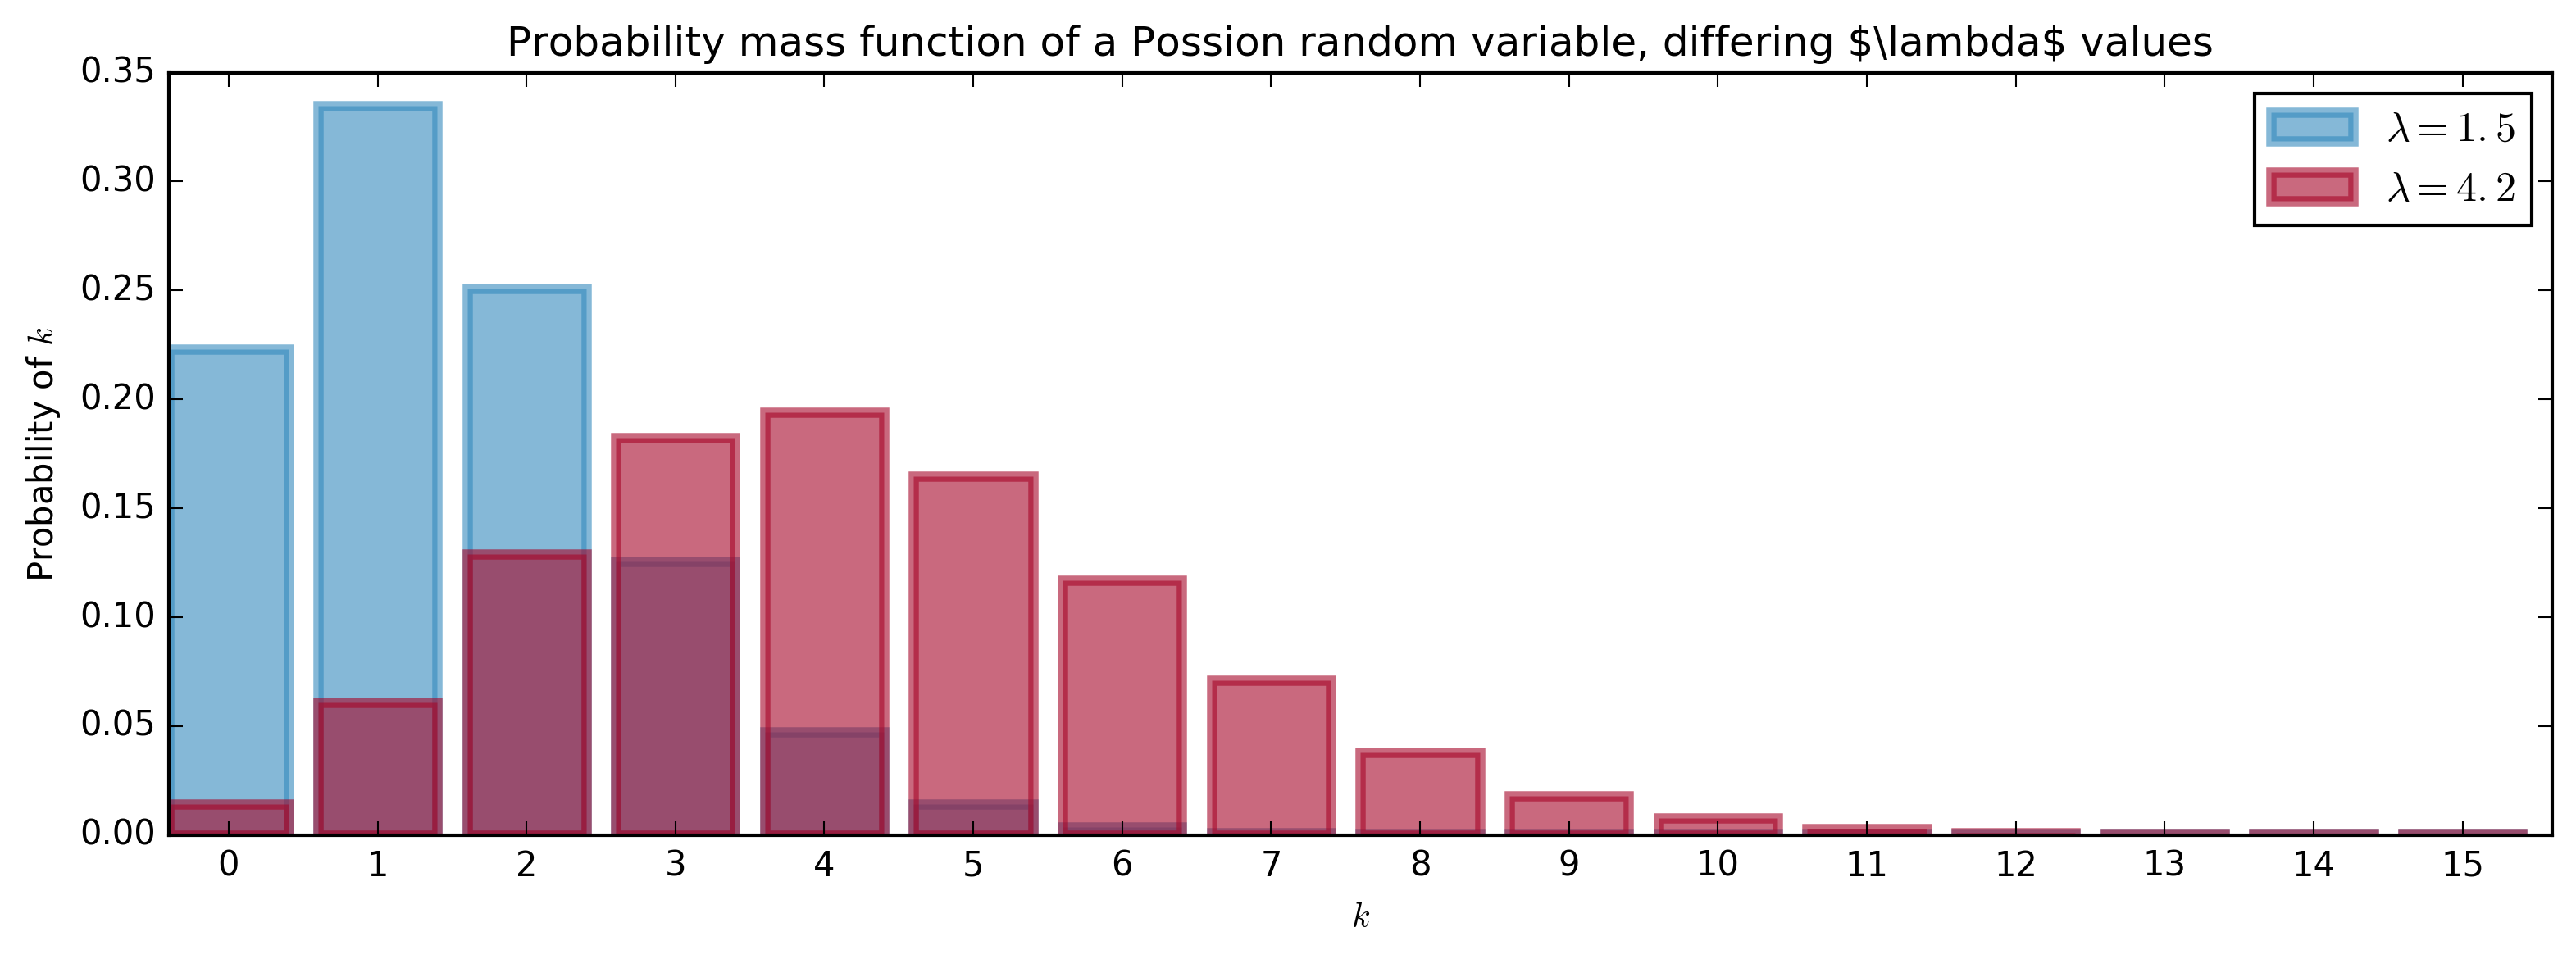

Populating the interactive namespace from numpy and matplotlib


In [36]:
%pylab inline

import scipy.stats as stats


figsize (12.5,4)
colors =['#348ABD', '#A60628']
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
plt.bar(a,
        poi.pmf(a, lambda_[0]),
        color=colors[0],
        label="$\lambda = %.1f$" % lambda_[0],
        alpha=0.60,
        edgecolor=colors[0],
        lw="3")
plt.bar(a,
        poi.pmf(a, lambda_[1]),
        color=colors[1],
        label="$\lambda = %.1f$" % lambda_[1],
        alpha=0.60,
        edgecolor=colors[1],
        lw="3")

plt.xticks(a +0.4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Possion random variable, differing \$\lambda$ values")

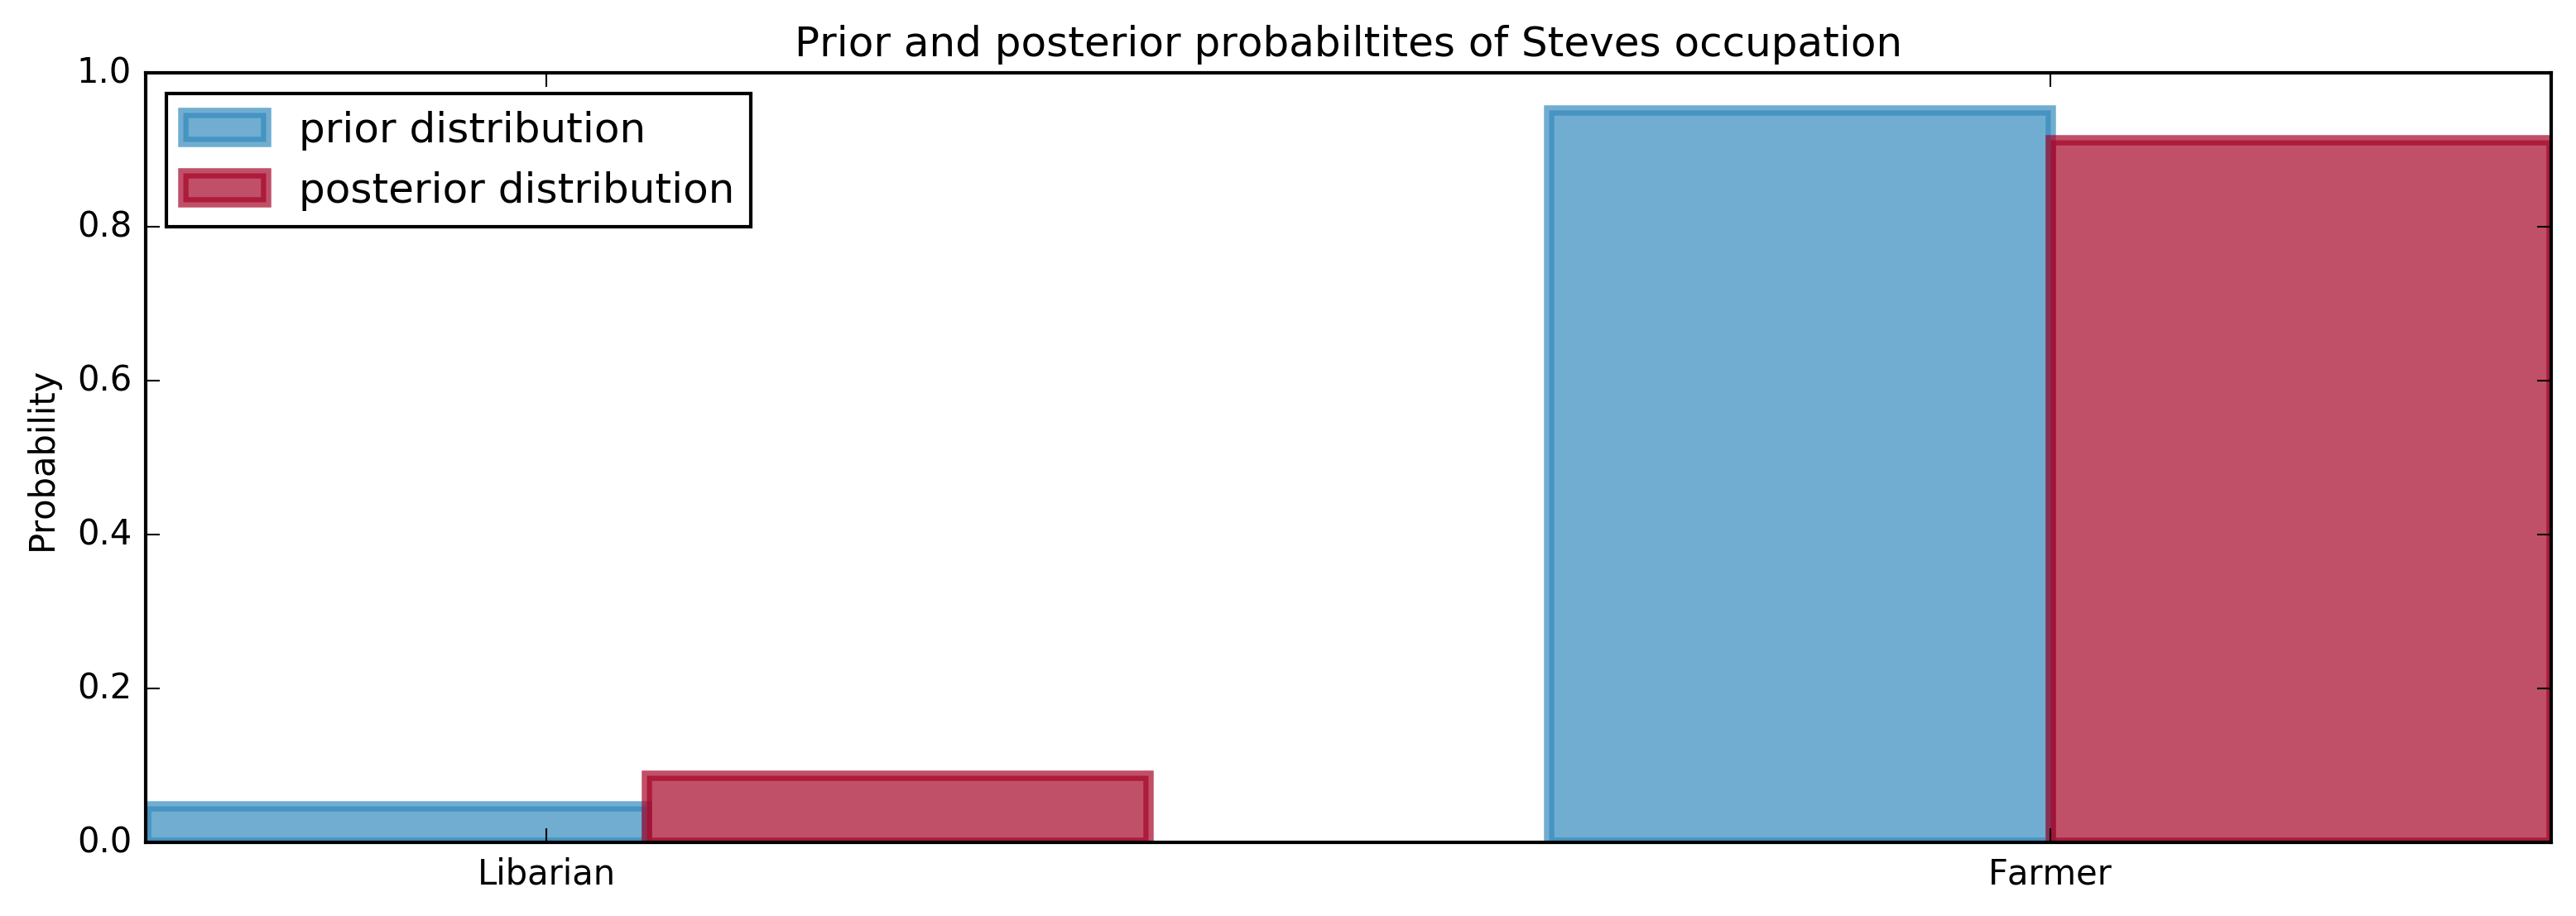

In [16]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi']= 300
colors = ['#348ABD', '#A60628']
prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]
plt.bar([0, .7], prior, alpha=0.7, width=0.25, color=colors[0], label='prior distribution', lw='3', edgecolor=colors[0])
plt.bar([0 + 0.25, .7 + 0.25], posterior, alpha=0.7, width=0.25, color=colors[1], label='posterior distribution', lw='3', edgecolor=colors[1])

plt.xticks ([0.2,0.95], ['Libarian', 'Farmer'])
plt.title('Prior and posterior probabiltites of Steve''s occupation')
plt.ylabel('Probability')
plt.legend(loc='upper left')

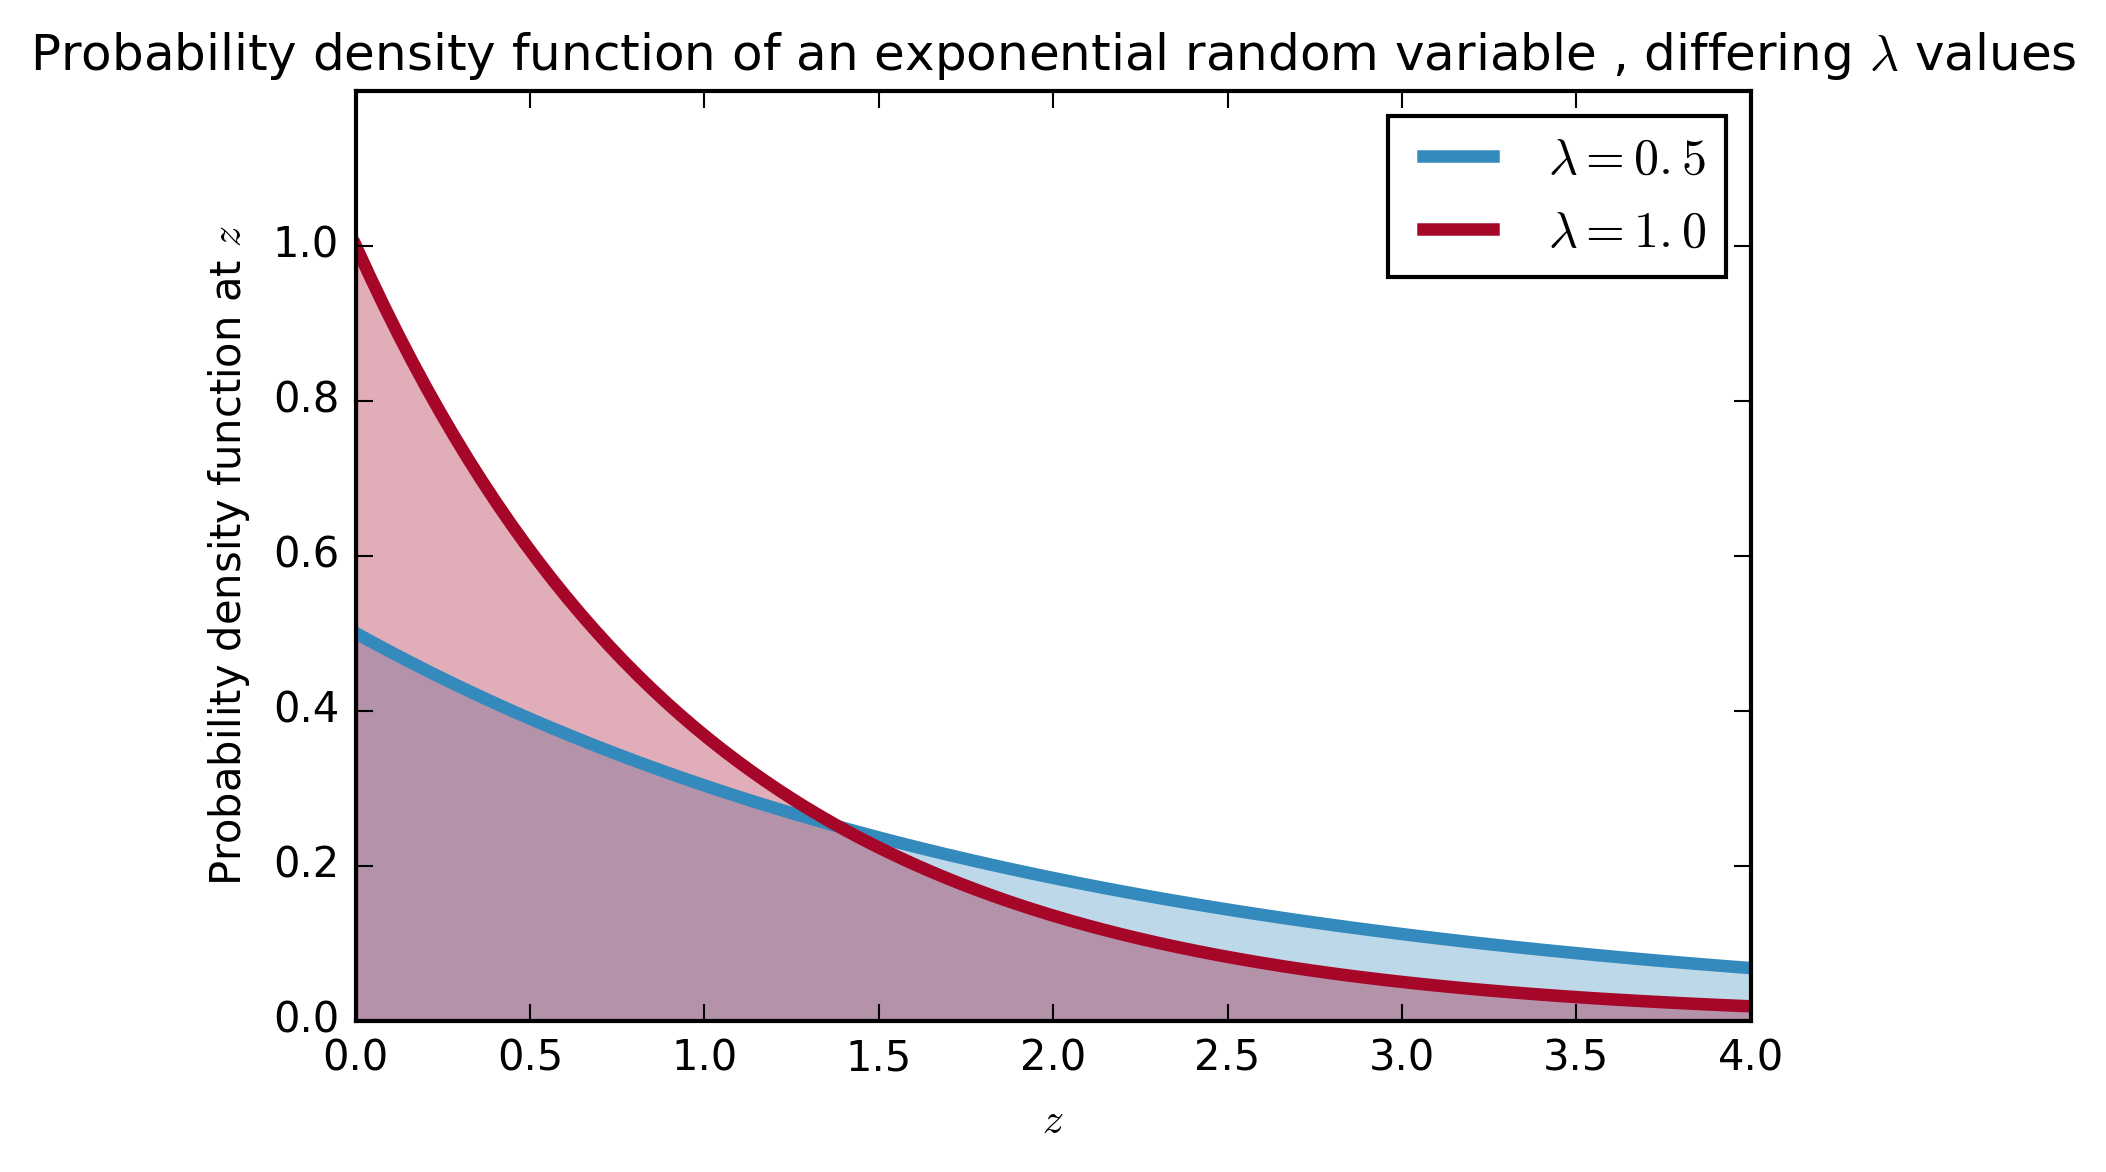

Populating the interactive namespace from numpy and matplotlib


In [35]:
%matplotlib inline
%pylab inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

a = np.linspace(0,4,100)
expo = stats.expon
lambda_ =  [0.5, 1]
colors = ['#348ABD', '#A60628']
for l, c in zip(lambda_, colors):
  plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
           color=c, label="$\lambda = %.1f$" % l)
  plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)
  plt.legend()
  plt.ylabel("Probability density function at $z$")
  plt.xlabel("$z$")
  plt.ylim(0,1.2)
  plt.title("Probability density function of an exponential random variable , differing $\lambda$ values")

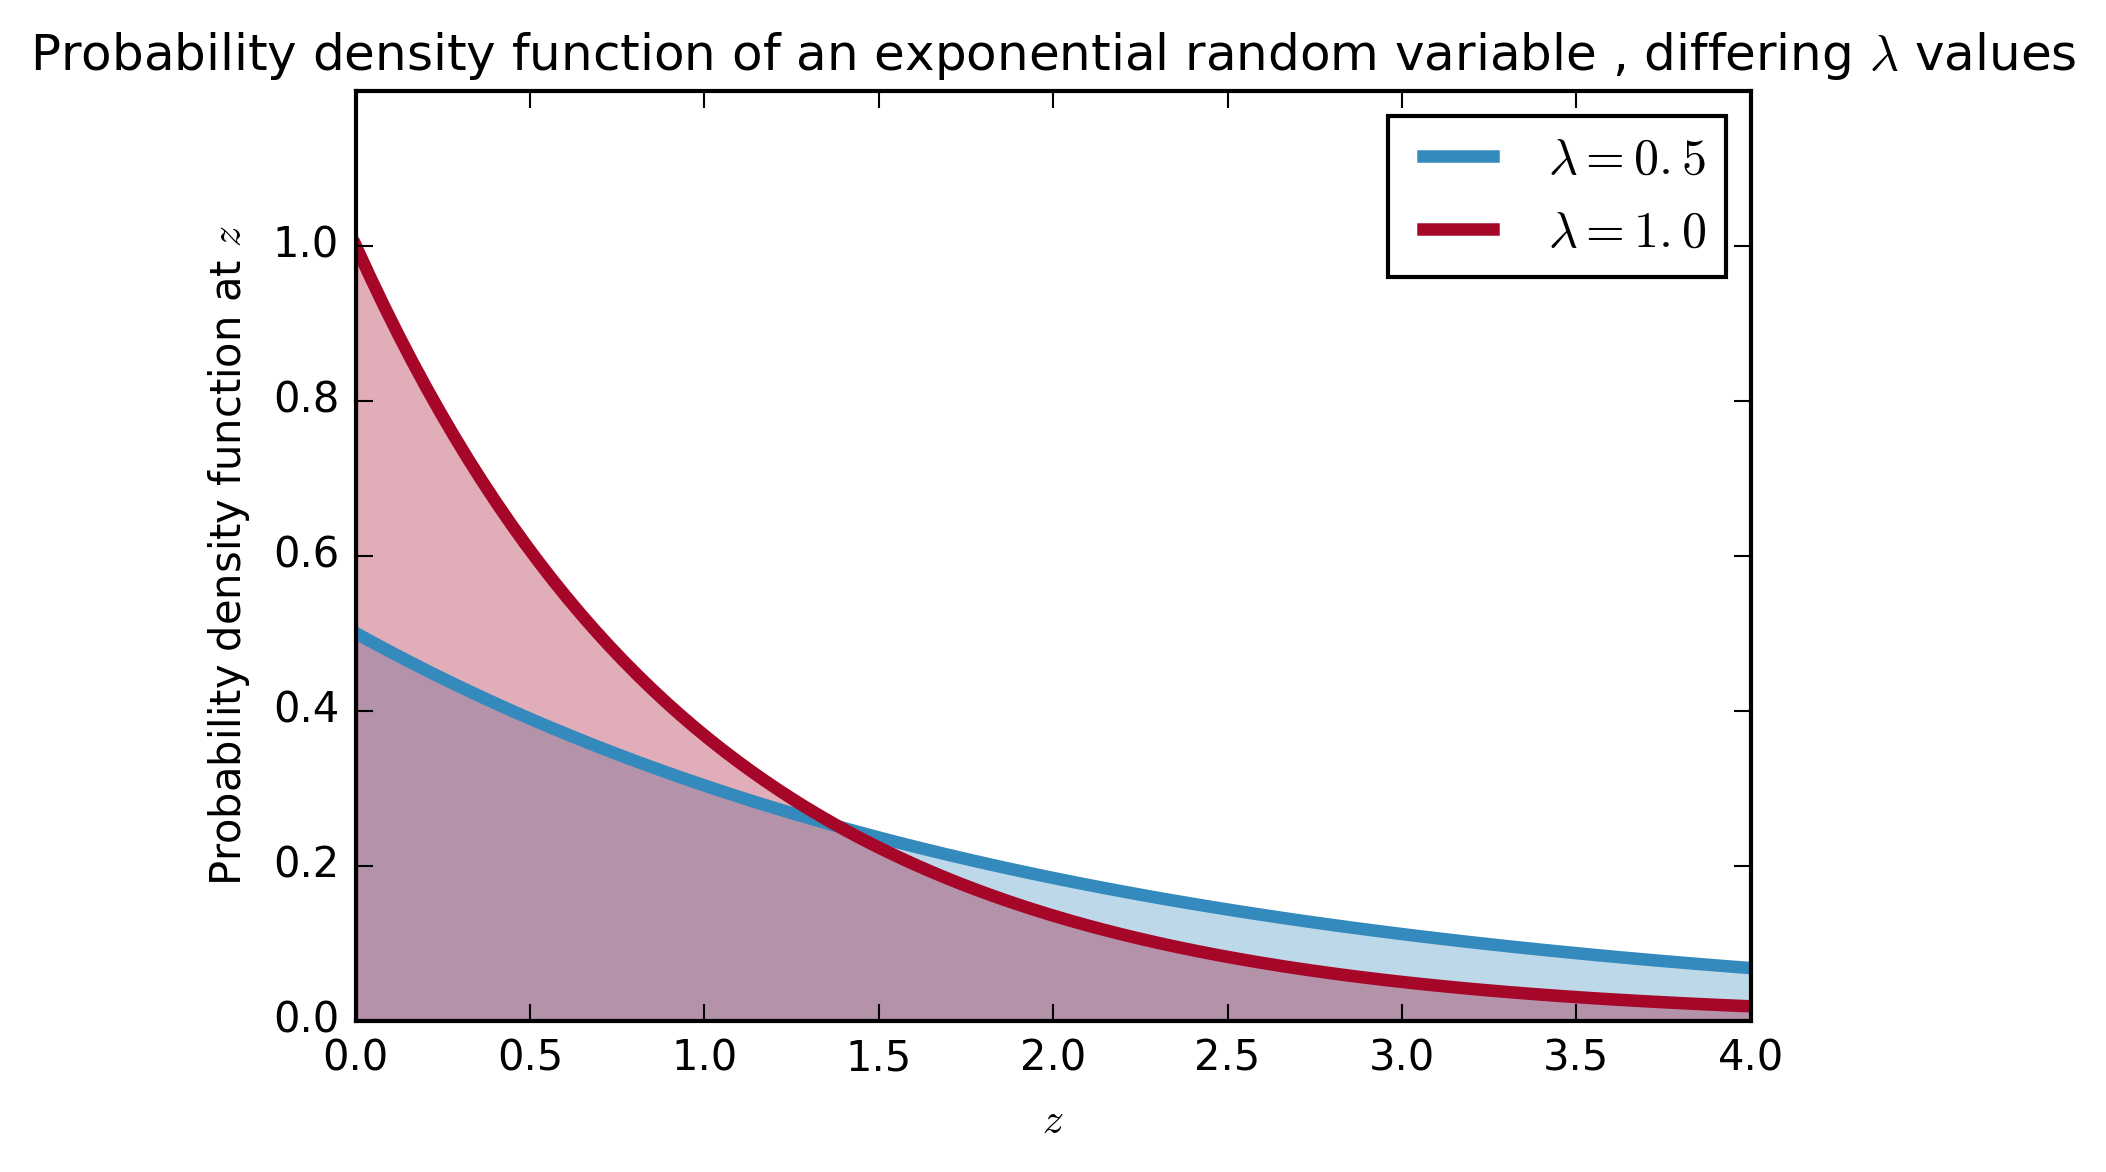

In [0]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

a = np.linspace(0,4,100)

expo = stats.expon
lambda_ =  [0.5, 1]
for l, c in zip(lambda_, colors):
  plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
          color=c, label="$\lambda = %.1f$" % l)
  plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)
  plt.legend()
  plt.ylabel("Probability density function at $z$")
  plt.xlabel("$z$")
  plt.ylim(0,1.2)
  plt.title("Probability density function of an exponential random variable , differing $\lambda$ values")

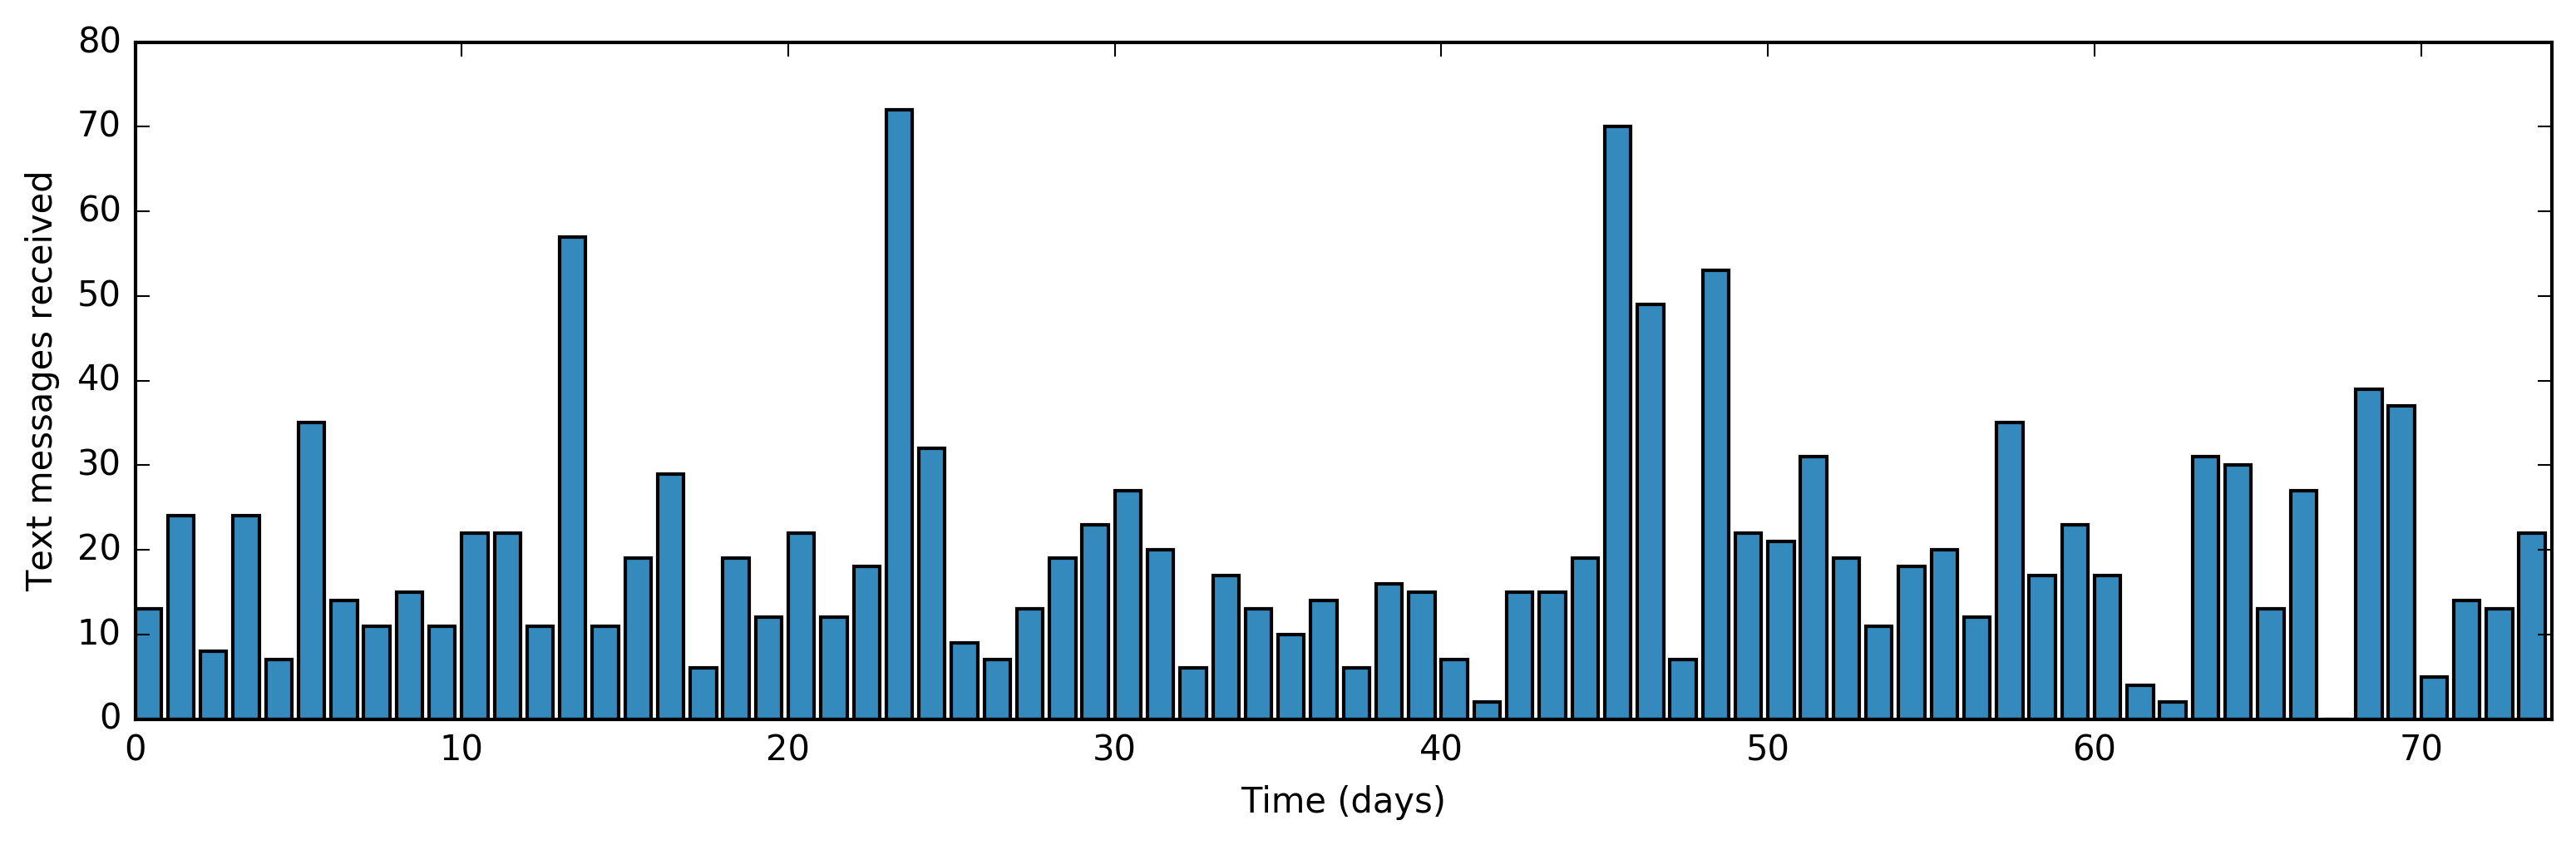

In [58]:
%matplotlib inline

figsize(12.5, 3.5)
count_data = np.loadtxt('data/txtdata.csv')
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color=colors[0])
plt.xlabel('Time (days)')
plt.ylabel('Text messages received')
plt.xlim(0, n_count_data)

import pymc as pm

alpha = 1.0/count_data.mean()
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

@pm.deterministic
def lambda_ (tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
  out = np.zeros(n_count_data)
  out[:tau] = lambda_1
  out[tau:] = lambda_2
  return out